# 09-Web scraping

This notebook gives an introduction to web scraping in Python using `pandas`.

Web sites often contain large amounts of data.

Many web sites have developed *APIs* in order to grant people access to their data. To use an API, we make a request to their web server and if the request is approved, the API returns the requested data. 

All APIs are different, and in order to know how to use a web site's API, we must read their API documentation (or find an online tutorial!). See e.g. this [tutorial](https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a) for the Twitter API.

However, a lot of data online is not available through an API. In which case, if we want to extract the data, we must do so through *web scraping*. In web scraping, we write programs that extracts information directly from the web site. 

Unfortunately, there is no ONE way of doing web scraping. What type of information we can extract from a web site and how to extract it varies from web site to web site. In fact many web sites do not want people to scrape their content, and therefore makes it difficult (in some cases, it might even be illegal to scrape the content from their web sites). 

We will look at two different ways that we can use `pandas` to scrape content off the web:
- Import data from URLs
- Read HTML tables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

## Import data from URLs

We have seen how to use `read_csv` to import CSV files. However, notice that `read_csv` can also import CSV files directly from an URL (see the [function documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).

**Example: titanic data**

We have used the `titanic` data throughout this course. This is a common data set to work on when learning how to do data science in Python and R. I collected the data set from [this](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv) user on github.

Instead of downloading the data file to our computer and then import it using `pandas`, we can import the file directly into our Python program by using the URL. 

Let us store the URL in a variable.

In [3]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

print(url)

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


We then pass the URL directly to `read_csv`. 

In [4]:
titanic = pd.read_csv(url)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Notice that the `titanic` data is a static data set (i.e. it is not likely to change over time). That means that we only need to download it once to our computer. The benefit of importing the data directly from the URL, as opposed to downloading it to our computer first, is therefore small.

However, when the data set is dynamic (i.e. more information is being added over time), there can be large gains from importing the data through the URL.

**Example: covid deaths**

The Center for Systems Science and Engineering at Johns Hopkins University has an online repository where they publish data related to covid. The file [time_series_covid19_confirmed_global.csv](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv) contains global time series on covid deaths, and it is being updated on a daily basis.


Let us write a program that imports the data, extracts the time series for a specific country and plots the data.

In [6]:
# define url
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# import file from url
df_full = pd.read_csv(url)

df_full.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,141,141,141,141,141,141,141,141,141,141
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847


Let us extract the time series for Norway.

In [7]:
# drop columns
df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

# extract country
country = 'Norway'
df_subset = df_full[df_full['Country/Region'] == country].copy()

df_subset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22
102,Denmark,0,0,0,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,15
103,Denmark,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
104,Denmark,0,0,0,0,0,0,0,0,0,...,3307,3322,3333,3343,3371,3385,3394,3408,3433,3453


Notice that this is *wide* data. We use `melt` to convert the data to a *long* format.

In [8]:
# melt df
df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

# convert to datetime
df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

# rename
df_subset.columns = ['country', 'date', 'total']

df_subset

,country,date,total
0,Denmark,2020-01-22,0
1,Denmark,2020-01-22,0
2,Denmark,2020-01-22,0
3,Denmark,2020-01-23,0
4,Denmark,2020-01-23,0
...,...,...,...
2164,Denmark,2022-01-12,2
2165,Denmark,2022-01-12,3433
2166,Denmark,2022-01-13,15
2167,Denmark,2022-01-13,2


We can now use the data to plot the cumulative sum of covid deaths in Norway over time. 

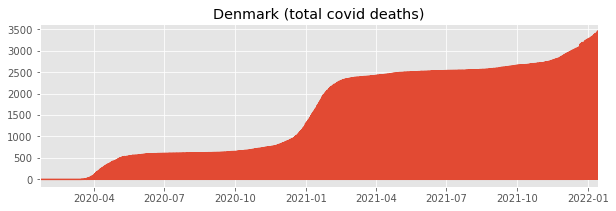

In [9]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(df_subset['date'],
        df_subset['total'])

# set xrange
ax.set_xlim(df_subset['date'].min(), df_subset['date'].max())

# set title
ax.set_title(country + ' (total covid deaths)')


plt.show()

Notice that the `deaths` column contains cumulative sum of the deaths over time. If we instead want the number of daily deaths, we can use `diff` to calculate the difference in the number of deaths from the day before.

In [10]:
df_subset['new'] = df_subset['total'].diff()

df_subset

,country,date,total,new
0,Denmark,2020-01-22,0,NaN
1,Denmark,2020-01-22,0,0.0
2,Denmark,2020-01-22,0,0.0
3,Denmark,2020-01-23,0,0.0
4,Denmark,2020-01-23,0,0.0
...,...,...,...,...
2164,Denmark,2022-01-12,2,-13.0
2165,Denmark,2022-01-12,3433,3431.0
2166,Denmark,2022-01-13,15,-3418.0
2167,Denmark,2022-01-13,2,-13.0


In [ ]:
fig, ax = plt.subplots(figsize = (10, 3))

ax.plot(df_subset['date'],
        df_subset['new'])

# set xrange
ax.set_xlim(df_subset['date'].min(), df_subset['date'].max())

# set title
ax.set_title(country + ' (new covid deaths)')


plt.show()

The online repository is updated daily, so we can simply re-run the program everytime we want the newest numbers. 

However, let us improve our program by placing it into two functions.

1. `get_deaths` take the name of a country, and extracts the data for that country and wrangles it into a suitable format. It returns a tidy `DataFrame` containing daily time series for total and new covid deaths.

In [12]:
def get_deaths(country):
    
    # define url
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

    # import file from url
    df_full = pd.read_csv(url)

    # drop columns
    df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

    # extract country
    df_subset = df_full[df_full['Country/Region'] == country].copy()
    
    # melt df
    df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

    # convert to datetime
    df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

    # rename
    df_subset.columns = ['country', 'date', 'total']
    
    # take difference
    df_subset['new'] = df_subset['total'].diff()

    
    return df_subset

2. `plot_deaths` takes a `DataFrame` with the country-specific time series and a string indicating whether we want to plot total or new covid deaths. It returns a plot of total or new deaths over time.

In [15]:
def plot_deaths(ylabel, country, df):
        
    fig, ax = plt.subplots(figsize = (10, 3))

    ax.plot(df['date'],
            df[ylabel])

    # set xrange
    ax.set_xlim(df['date'].min(), df['date'].max())

    # set title
    ax.set_title(country + ' (' + ylabel + ' covid deaths)')

    plt.show()

We can now use the function to extract and plot covid deaths for any country in the online data file.

In [ ]:
country = 'Norway'
#country = 'Sweden'
#country = 'Denmark'
df_subset = get_deaths(country)
df_subset

In [ ]:
plot_deaths('new', country, df_subset)

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Notice that <code>get_plot</code> returns strange plots for some countries, e.g. Denmark. Inspect the output  of <code>get_deaths</code> and the online data set and see if you can figure out what is causing this. Fix <code>get_deaths</code> so that we get correct plots for all countries.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#

# Notice that some countries are split over multiple rows in the online data. That is because they report covid deaths 
# seperately for the different regions/states in that country. 
# We can fix our program by simply adding an additional line of code in get_data that sums all of the deaths across the 
# regions/state for each country.


def get_deaths(country):
    
    # define url
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

    # import file from url
    df_full = pd.read_csv(url)

    # drop columns
    df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
    
    # sum all provinces/states
    df_full = df_full.groupby('Country/Region').sum().reset_index()

    # extract country
    df_subset = df_full[df_full['Country/Region'] == country].copy()
    
    # melt df
    df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

    # convert to datetime
    df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

    # rename
    df_subset.columns = ['country', 'date', 'total']
    
    # take difference
    df_subset['new'] = df_subset['total'].diff()

    
    return df_subset


def plot_deaths(ylabel, country, df):
        
    fig, ax = plt.subplots(figsize = (10, 3))

    ax.plot(df['date'],
            df[ylabel])

    # set xrange
    ax.set_xlim(df['date'].min(), df['date'].max())

    # set title
    ax.set_title(country + ' (' + ylabel + ' covid deaths)')

    plt.show()
    
    
country = 'Denmark'
df_subset = get_deaths(country)
plot_deaths('new', country, df_subset)
```

</p>
</details> 

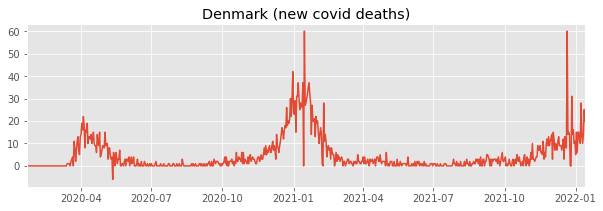

In [19]:
country = 'Denmark'
df_subset2 = get_deaths(country)
df_subset2
def get_deaths(country):
    
    # define url
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

    # import file from url
    df_full = pd.read_csv(url)

    # drop columns
    df_full.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

    #Sum the different regions
    df_full = df_full.groupby('Country/Region').sum().reset_index()
    # extract country
    df_subset = df_full[df_full['Country/Region'] == country].copy()
    
    # melt df
    df_subset = df_subset.melt(id_vars = ['Country/Region'], var_name = 'date', value_name = 'deaths')

    # convert to datetime
    df_subset['date'] = pd.to_datetime(df_subset['date'], format = '%m/%d/%y')

    # rename
    df_subset.columns = ['country', 'date', 'total']
    
    # take difference
    df_subset['new'] = df_subset['total'].diff()

    
    return df_subset

plot_deaths('new',country,df_subset2)

**Example: Yahoo finance**

Yahoo finance contains historical data on price and trading volume for many different stocks. Yahoo finance used to have an official API, but it was shutdown in 2017. However, we can download historical data by scraping it directly off the web site.

Let us extract the historical data for [Apple](https://finance.yahoo.com/quote/AAPL/history?p=AAPL).

We import the data directly from the URL (we get the url from right-clicking the "download" button and pressing "save as...").

In [21]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1603411200&period2=1619136000&interval=1d&events=history&includeAdjustedClose=true'
print(url)

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1603411200&period2=1619136000&interval=1d&events=history&includeAdjustedClose=true


In [22]:
apple = pd.read_csv(url)

apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-23,116.389999,116.550003,114.279999,115.040001,114.138237,82572600
1,2020-10-26,114.010002,116.550003,112.879997,115.050003,114.148155,111850700
2,2020-10-27,115.489998,117.279999,114.540001,116.599998,115.686005,92276800
3,2020-10-28,115.050003,115.430000,111.099998,111.199997,110.328331,143937800
4,2020-10-29,112.370003,116.930000,112.199997,115.320000,114.416039,146129200
...,...,...,...,...,...,...,...
119,2021-04-16,134.300003,134.669998,133.279999,134.160004,133.537262,84922400
120,2021-04-19,133.509995,135.470001,133.339996,134.839996,134.214081,94264200
121,2021-04-20,135.020004,135.529999,131.809998,133.110001,132.492126,94812300
122,2021-04-21,132.360001,133.750000,131.300003,133.500000,132.880295,68847100


Notice that the URL contains several "parameters". Let us store these parameters in variables and then concat the URL back together.

In [39]:
ticker = 'AAPL'       # ticker name
period1 = 1603411200  # start period
period2 = 1619049600  # end period

url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'
print(url)

https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1603411200&period2=1619049600&interval=1d&events=history&includeAdjustedClose=true


Let us download historical data for Apple for every weekday last year. 

Notice that the time periods are measured in Unix time, i.e. the number of seconds that have elapsed since midnight on January 1, 1970. This point of reference is known as the Unix epoch. It is common for computer systems to use Unix time. 

We can convert between Unix time and a date by using the `datetime` module.

In [27]:
import datetime as dt

`datetime` has a function called `datetime` that we can use to create convert date to timestamps.

In [28]:
dt.datetime(2021, 1, 1, 23, 59)

datetime.datetime(2021, 1, 1, 23, 59)

We can then apply the function `timestamp` to convert the timestamp to the number of second between that date and the Unix Epoch.

In [32]:
dt.datetime(2021, 1, 1, 23, 59).timestamp()

1609541940.0

In [37]:
# define periods
period1 = int(dt.datetime(2021, 1, 1, 23, 59).timestamp())
period2 = int(dt.datetime(2021, 12, 31, 23, 59).timestamp())

print(period1)
print(period2)

1609541940
1640991540


In [40]:
# define ticker
ticker = 'AAPL'

# define url
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'

# import data
apple = pd.read_csv(url)

apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-23,116.389999,116.550003,114.279999,115.040001,114.138237,82572600
1,2020-10-26,114.010002,116.550003,112.879997,115.050003,114.148163,111850700
2,2020-10-27,115.489998,117.279999,114.540001,116.599998,115.686012,92276800
3,2020-10-28,115.050003,115.430000,111.099998,111.199997,110.328339,143937800
4,2020-10-29,112.370003,116.930000,112.199997,115.320000,114.416039,146129200
...,...,...,...,...,...,...,...
118,2021-04-15,133.820007,135.000000,133.639999,134.500000,133.875671,89347100
119,2021-04-16,134.300003,134.669998,133.279999,134.160004,133.537262,84922400
120,2021-04-19,133.509995,135.470001,133.339996,134.839996,134.214096,94264200
121,2021-04-20,135.020004,135.529999,131.809998,133.110001,132.492126,94812300


Let us instead extract historical data for Amazon. The ticker for Amazon is `AMZN`.

In [43]:
# define ticker
ticker = 'AMZN'

# define url
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'

print(url)

https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1603411200&period2=1619049600&interval=1d&events=history&includeAdjustedClose=true


In [44]:
# import data
amazon = pd.read_csv(url)

amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-23,3191.000000,3205.330078,3140.000000,3204.399902,3204.399902,3466700
1,2020-10-26,3198.739990,3282.979980,3153.300049,3207.040039,3207.040039,5901200
2,2020-10-27,3224.939941,3291.659912,3211.300049,3286.330078,3286.330078,4291000
3,2020-10-28,3249.300049,3264.020020,3162.469971,3162.780029,3162.780029,5588300
4,2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500
...,...,...,...,...,...,...,...
118,2021-04-15,3371.000000,3397.000000,3352.000000,3379.090088,3379.090088,3233600
119,2021-04-16,3380.000000,3406.800049,3355.590088,3399.439941,3399.439941,3186000
120,2021-04-19,3390.330078,3435.929932,3360.159912,3372.010010,3372.010010,2725400
121,2021-04-20,3373.600098,3382.989990,3316.000000,3334.689941,3334.689941,2623000


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> The file <code>closing_prices.csv</code> contains the daily closing price in 2020 for ten different companies. Import the file and create a list of the tickers. Use this list of tickers to extract the daily opening price for the ten companies from Yahoo finance. Store the daily opening prices in a file called <code>opening_prices.csv</code> on your computer. 
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#

# import file
df_close = pd.read_csv('data/closing_prices.csv')

# extract tickers
tickers = df_close['Stock'].unique()

# define periods
period1 = int(datetime(2020, 1, 1, 23, 59).timestamp())
period2 = int(datetime(2020, 12, 31, 23, 59).timestamp())

# define folder
df_lst = []

for ticker in tickers:
    
    # define url
    url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'
    
    # extract data
    temp_df = pd.read_csv(url)
    
    # keep only open price and add stock name
    temp_df = temp_df[['Date', 'Open']].copy()
    temp_df['Stock'] = ticker

    # append to list
    df_lst.append(temp_df)

# concat to single df (and reset index)
df_open = pd.concat(df_lst).reset_index(drop = True)

df_open.to_csv('data/opening_prices.csv', index = False)
```

</p>
</details> 

In [54]:
closing = pd.read_csv("data/closing_prices.csv")
closing = closing.pivot(index="Date",columns="Stock",values="Close").copy()

period1 = int(dt.datetime(2021,1,1,23,59).timestamp())
int(dt.datetime(2021, 1, 1, 23, 59).timestamp())
Ticker_List = []
for i in closing.columns:
    Ticker_List.append(i)

Folder = []
for Ticker in Ticker_List: 
    
    url = 'https://query1.finance.yahoo.com/v7/finance/download/' + Ticker + '?period1=' + str(period1) + '&period2=' + str(period2) + '&interval=1d&events=history&includeAdjustedClose=true'
    stock = pd.read_csv(url)
    stock = stock[["Date","Open"]].copy()
    stock["Stock"]=Ticker
    
    Folder.append(stock)

Folder_OpenPrice = pd.concat(Folder).reset_index(drop=True)

Folder_OpenPrice.to_csv("data/opening_prices.csv",index=False)


    

,Date,Open,Stock
0,2021-01-04,133.520004,AAPL
1,2021-01-05,128.889999,AAPL
2,2021-01-06,127.720001,AAPL
3,2021-01-07,128.360001,AAPL
4,2021-01-08,132.429993,AAPL
...,...,...,...
745,2021-04-15,139.399994,WMT
746,2021-04-16,140.889999,WMT
747,2021-04-19,140.289993,WMT
748,2021-04-20,139.419998,WMT


## Scrape HTML tables

Many web sites display data in the form of HTML tables.

`pandas` has a function, `read_html`, that takes an URL as a parameter, and returns all HTML tables found on that web site as a list of `DataFrame`s.

#### Example: Wikipedia

[This](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)) Wikipedia page contains a table with countries and their estimated GDP by IMF, World Bank and United Nations. We want to scrape the information in this table of the web page.

In [57]:
# define url
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

# scrape web page for html tables
tables = pd.read_html(url)
print(len(tables))


7


Notice that `read_html` ended up scraping more than the one table that we are after... 

In [58]:
tables[0]

,0
0,Largest economies by nominal GDP in 2021[1]


By inspecting the page source of the url (search for "table class"), we can see that the table that we are after belongs to the table class `wikitable sortable static-row-numbers plainrowheaders srn-white-background`.

We can narrow down the number of tables being scraped by giving the parameter `attrs` a dictionary where we specify that we only want the tables that have `class` equal to a `wikitable sortable static-row-numbers plainrowheaders srn-white-background`.

In addition, we set the parameter `header` equal to `0` in order to make sure that the first row in each table is used as the column labels.

In [59]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(
    url, 
    header = 0, 
    attrs = {'class' : 'wikitable sortable static-row-numbers plainrowheaders srn-white-background'}
)

print(len(tables))

1


In [60]:
tables[0].head()

,Country/Territory,Region,IMF[1],IMF[1].1,United Nations[12],United Nations[12].1,World Bank[13][14],World Bank[13][14].1
0,Country/Territory,Region,Estimate,Year,Estimate,Year,Estimate,Year
1,United States,Americas,22939580,2021,21433226,2019,20936600,2020
2,China,Asia,16862979,[n 2]2021,14342933,[n 3]2019,14722731,2020
3,Japan,Asia,5103110,2021,5082465,2019,4975415,2020
4,Germany,Europe,4230172,2021,3861123,2019,3806060,2020


Let us extract the GDP data from the United Nations.

In [61]:
# extract table 
df_gdp = tables[0]

# rename and extract columns
df_gdp.rename(columns = {'Country/Territory' : 'Country', 'United Nations[12]' : 'GDP'}, inplace = True)
df_gdp = df_gdp[['Country', 'GDP']].copy()

df_gdp.head()

,Country,GDP
0,Country/Territory,Estimate
1,United States,21433226
2,China,14342933
3,Japan,5082465
4,Germany,3861123


In [62]:
# drop first row
df_gdp.drop(0, inplace = True)

# convert gdp to float
df_gdp['GDP'] = df_gdp['GDP'].astype(float)

# drop missing
df_gdp.dropna(inplace = True)

print('Number of countries: ' + str(df_gdp['Country'].nunique()))
df_gdp.head()

Number of countries: 213


,Country,GDP
1,United States,21433226.0
2,China,14342933.0
3,Japan,5082465.0
4,Germany,3861123.0
5,United Kingdom,2826441.0


In [63]:
df_gdp['Country'].unique()

array(['United States', 'China', 'Japan', 'Germany', 'United Kingdom',
       'India', 'France', 'Italy', 'Canada', 'South Korea', 'Russia',
       'Australia', 'Brazil', 'Spain', 'Mexico', 'Indonesia',
       'Netherlands', 'Switzerland', 'Saudi Arabia', 'Turkey', 'Taiwan',
       'Iran', 'Poland', 'Sweden', 'Belgium', 'Thailand', 'Nigeria',
       'Austria', 'Ireland', 'Israel', 'Norway', 'Argentina',
       'Bangladesh', 'Philippines', 'United Arab Emirates', 'Egypt',
       'Denmark', 'Malaysia', 'Singapore', 'Hong Kong', 'Vietnam',
       'South Africa', 'Chile', 'Finland', 'Colombia', 'Pakistan',
       'Romania', 'Czech Republic', 'Portugal', 'New Zealand', 'Peru',
       'Greece', 'Iraq', 'Kazakhstan', 'Qatar', 'Hungary', 'Ukraine',
       'Algeria', 'Kuwait', 'Morocco', 'Slovakia', 'Cuba', 'Puerto Rico',
       'Ecuador', 'Kenya', 'Ethiopia', 'Sri Lanka', 'Dominican Republic',
       'Guatemala', 'Myanmar', 'Oman', 'Luxembourg', 'Bulgaria', 'Angola',
       'Ghana', 'Panama', 

[This](https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)) Wikipedia page contains information on countries and their estimated population by the United Nations.

In [1]:
# define url
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'

# scrape html tables of web page
tables = pd.read_html(url)
print(len(tables))

NameError: name 'pd' is not defined

In [66]:
tables[0]

,Country/Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [67]:
# extract table
df_pop = tables[0]

# rename and extract columns
df_pop.rename(columns = {'Country/Area' : 'Country', 'Population(1 July 2019)' : 'pop'}, inplace = True)
df_pop = df_pop[['Country', 'pop']].copy()

df_pop.head()

,Country,pop
0,China[a],1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318


In [68]:
# remove parenthesis and square brackets from country names
df_pop['Country'] = df_pop['Country'].str.split('(', expand = True)[0]
df_pop['Country'] = df_pop['Country'].str.split('[', expand = True)[0]

# drop world
df_pop = df_pop[df_pop['Country'] != 'World'].copy()

print('Number of countries: ' + str(df_pop['Country'].nunique()))
df_pop.head()

Number of countries: 233


,Country,pop
0,China,1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318


In [69]:
df_pop['Country'].unique()

array(['China', 'India', 'United States', 'Indonesia', 'Pakistan',
       'Brazil', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico', 'Japan',
       'Ethiopia', 'Philippines', 'Egypt', 'Vietnam', 'DR Congo',
       'Germany', 'Turkey', 'Iran', 'Thailand', 'United Kingdom',
       'France', 'Italy', 'South Africa', 'Tanzania', 'Myanmar', 'Kenya',
       'South Korea', 'Colombia', 'Spain', 'Argentina', 'Uganda',
       'Ukraine', 'Algeria', 'Sudan', 'Iraq', 'Afghanistan', 'Poland',
       'Canada', 'Morocco', 'Saudi Arabia', 'Uzbekistan', 'Peru',
       'Malaysia', 'Angola', 'Mozambique', 'Yemen', 'Ghana', 'Nepal',
       'Venezuela', 'Madagascar', 'North Korea', 'Ivory Coast',
       'Cameroon', 'Australia', 'Taiwan', 'Niger', 'Sri Lanka',
       'Burkina Faso', 'Mali', 'Romania', 'Malawi', 'Chile', 'Kazakhstan',
       'Zambia', 'Guatemala', 'Ecuador', 'Netherlands', 'Syria',
       'Cambodia', 'Senegal', 'Chad', 'Somalia', 'Zimbabwe', 'Guinea',
       'Rwanda', 'Benin', 'Tunisia', 'Belgiu

Merge the `DataFrame`s in order to estimate countries' GDP per capita.

In [70]:
# inner join
df = df_gdp.merge(df_pop, on = 'Country', how = 'inner')

# calculate GDP per capita (multiply with 1,000,000 since GDP is measured in million $)
df['GDP_pc'] = df['GDP']*1000000 / df['pop']

print('Number of countries: ' + str(df['Country'].nunique()))
df.head()

Number of countries: 195


,Country,GDP,pop,GDP_pc
0,United States,21433226.0,329064917,65133.731652
1,China,14342933.0,1433783686,10003.554330
2,Japan,5082465.0,126860301,40063.478960
3,Germany,3861123.0,83517045,46231.556684
4,United Kingdom,2826441.0,67530172,41854.491352


In [ ]:
#df['Country'].unique()

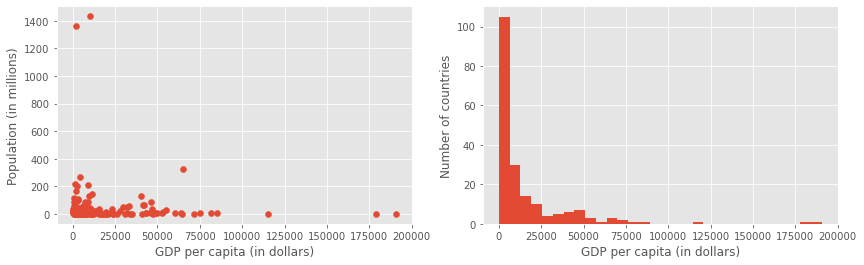

In [71]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 4))

ax[0].scatter(df['GDP_pc'], df['pop'] / 1000000)
ax[0].set_ylabel('Population (in millions)')
ax[0].set_xlabel('GDP per capita (in dollars)')

ax[1].hist(df['GDP_pc'], bins = 30)
ax[1].set_ylabel('Number of countries')
ax[1].set_xlabel('GDP per capita (in dollars)')

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> <a href="https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy">This</a> Wikipedia site contains information on life expectancy for countries in the world. Notice that the site contains many different tables. Choose the table with the estimated life expectancies from UNDP 2019. 
        
Use this data to create a scatter plot between country GDP per capita and life expectancy, with each marker weighted by country population.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
### Tidy data ###

# scrape tables
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
tables = pd.read_html(
    url,       
    header = 0,
    attrs = {'class' : 'wikitable sortable static-row-numbers plainrowheaders srn-white-background'}
)
print(len(tables))

# extract and rename data
df_life = tables[1]
df_life.rename(columns = {'Countries and regions' : 'Country', 'Life expectancy at birth' : 'life_exp'}, inplace = True)
df_life = df_life[['Country', 'life_exp']].copy()

# drop first row
df_life.drop(0, inplace = True)

# convert to float
df_life['life_exp'] = df_life['life_exp'].astype(float)

print('Number of countries: ' + str(df_life['Country'].nunique()))

# merge population and life expectency data (inner join)
df2 = df_life.merge(df, on = 'Country', how = 'inner')

print('Number of countries: ' + str(df2['Country'].nunique()))


### Plot ###

fig, ax = plt.subplots(figsize = (10, 4))

ax.scatter(
    df2['GDP_pc'],             # x-values
    df2['life_exp'],           # y-values
    s = df2['pop'] / 1000000   # population weights (must divide by 1000000 to make markers visible)
)

ax.set_ylabel('Life expectancy (in yrs)')
ax.set_xlabel('GDP per capita (in dollars)')

ax.set_title('Life expectency vs GDP per capita, United Nations (2019)')

plt.show()
```

</p>
</details> 

Number of countries: 196
Number of countries: 188


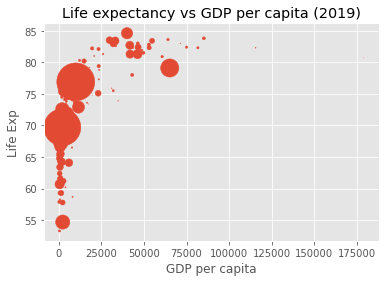

In [146]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
    
tables = pd.read_html(url,header=0)

df_exp = tables[2]
df_exp.rename(columns={'Countries and regions': 'Country', 'Life expectancy at birth': 'life_exp'},inplace=True)
df_exp = df_exp[['Country','life_exp']].copy()
df_exp.drop(0,inplace=True)

df_exp["life_exp"] = df_exp["life_exp"].astype(float).copy()

print("Number of countries: "+str(df_exp["Country"].nunique()))
df2 = df_exp.merge(df, on = 'Country', how = 'inner')

print("Number of countries: "+str(df2["Country"].nunique()))



fig,ax  =plt.subplots()

ax.scatter(df2["GDP_pc"],
          df2["life_exp"],
          s=df2['pop']/1000000)

ax.set_ylabel("Life Exp")
ax.set_xlabel("GDP per capita")

ax.set_title('Life expectancy vs GDP per capita (2019)')
plt.show()




### Summary

`pandas` is super useful for web scraping! As you have seen, we have scraped many different web sites using just `pandas`.

However, there are some limitations to what we can use `pandas` for:
- `read_csv` can only be used to extract data that is in the form of csv files.
- `read_html` can only be used to extract data that is in the form of HTML tables. 

If you want to extract data from a web site that is not in the form of a csv file or HTML table, you need to use something more powerful, e.g. `requests` and `BeautifulSoup`. See [this](https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/) or [this](https://betterprogramming.pub/how-to-use-pandas-for-web-scraping-not-enough-try-beautiful-soup-98d0362d5bb1) tutorial for how to use these packages to scrape additional HTML data.

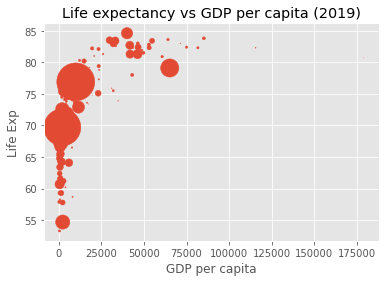

2
Number of countries: 196
Number of countries: 188


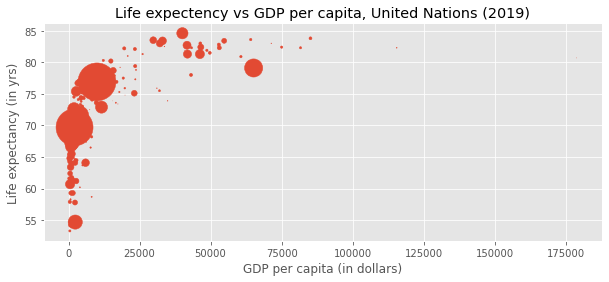